In [74]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

## Cleaning data, Detect and remove outliers.

In [115]:
data = pd.read_csv("testset.csv",parse_dates=['datetime_utc'],skipinitialspace=True)

In [116]:
data.fillna(0)

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,1996-11-01 11:00:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,1996-11-01 12:00:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,1996-11-01 13:00:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,1996-11-01 14:00:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,1996-11-01 16:00:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0
5,1996-11-01 17:00:00,Smoke,12.0,0,0,NaN,56.0,NaN,1011.0,0,0,21.0,0,0,NaN,0.0,North,NaN,NaN,NaN
6,1996-11-01 18:00:00,Smoke,13.0,0,0,NaN,60.0,NaN,1010.0,0,0,21.0,0,0,0.8,0.0,North,NaN,NaN,0.0
7,1996-11-01 19:00:00,Smoke,13.0,0,0,NaN,60.0,NaN,-9999.0,0,0,21.0,0,0,NaN,0.0,North,NaN,NaN,NaN
8,1996-11-01 20:00:00,Smoke,13.0,0,0,NaN,68.0,NaN,-9999.0,0,0,19.0,0,0,NaN,0.0,North,NaN,NaN,NaN
9,1996-11-01 21:00:00,Smoke,13.0,0,0,NaN,68.0,NaN,1010.0,0,0,19.0,0,0,NaN,0.0,North,NaN,NaN,NaN


In [114]:
data.drop('_precipm',axis=1)

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,1996-11-01 11:00:00,Smoke,9.0,0,0,NaN,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,1996-11-01 12:00:00,Smoke,10.0,0,0,NaN,32.0,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,1996-11-01 13:00:00,Smoke,11.0,0,0,NaN,44.0,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,1996-11-01 14:00:00,Smoke,10.0,0,0,NaN,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,1996-11-01 16:00:00,Smoke,11.0,0,0,NaN,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0
5,1996-11-01 17:00:00,Smoke,12.0,0,0,NaN,56.0,1011.0,0,0,21.0,0,0,NaN,0.0,North,NaN,NaN,NaN
6,1996-11-01 18:00:00,Smoke,13.0,0,0,NaN,60.0,1010.0,0,0,21.0,0,0,0.8,0.0,North,NaN,NaN,0.0
7,1996-11-01 19:00:00,Smoke,13.0,0,0,NaN,60.0,-9999.0,0,0,21.0,0,0,NaN,0.0,North,NaN,NaN,NaN
8,1996-11-01 20:00:00,Smoke,13.0,0,0,NaN,68.0,-9999.0,0,0,19.0,0,0,NaN,0.0,North,NaN,NaN,NaN
9,1996-11-01 21:00:00,Smoke,13.0,0,0,NaN,68.0,1010.0,0,0,19.0,0,0,NaN,0.0,North,NaN,NaN,NaN


In [76]:
data['Date'] = pd.to_datetime(data['datetime_utc'])
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['hour'] = data['Date'].dt.hour

In [77]:
plt.style.use('fivethirtyeight')

## Rain 

Text(0.5, 0, 'year')

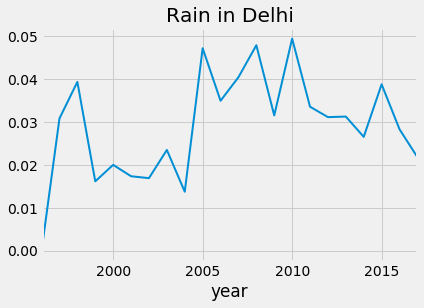

In [78]:
delhi_rain = data.groupby(data.year).mean()
delhi_rain._rain.plot(linewidth=2)
a1 = delhi_rain._rain
plt.title('Rain in Delhi')
plt.xlabel('year')

## Dewptm 

Text(0.5, 0, 'year')

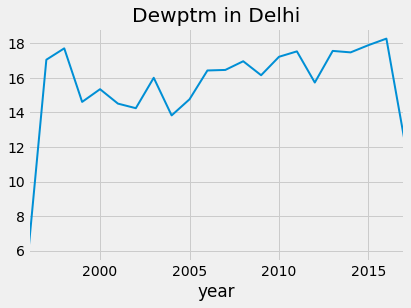

In [79]:
delhi_dewptm = data.groupby(data.year).mean()
delhi_dewptm._dewptm.plot(linewidth=2)
a2 = delhi_dewptm._dewptm
plt.title('Dewptm in Delhi')
plt.xlabel('year')

## Humidity 

Text(0.5, 0, 'year')

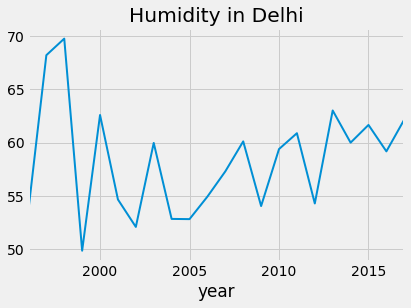

In [80]:
delhi_hum = data.groupby(data.year).mean()
delhi_hum._hum.plot(linewidth=2)
a3 = delhi_hum._hum
plt.title('Humidity in Delhi')
plt.xlabel('year')

## Pressure 

Text(0.5, 0, 'year')

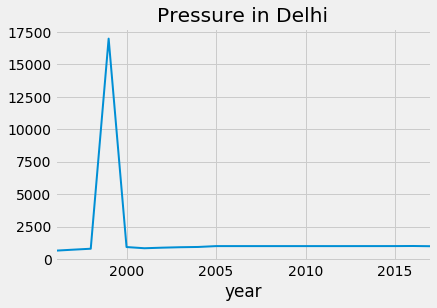

In [81]:
delhi_pressurem = data.groupby(data.year).mean()
delhi_pressurem._pressurem.plot(linewidth=2)
a4 = delhi_pressurem._pressurem
plt.title('Pressure in Delhi')
plt.xlabel('year')

## Snow

Text(0.5, 0, 'year')

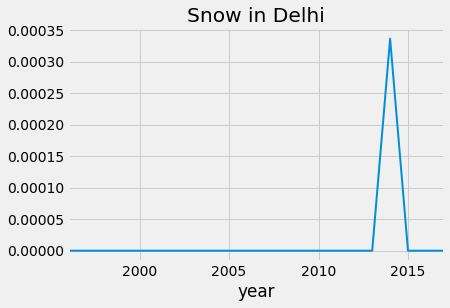

In [82]:
delhi_snow = data.groupby(data.year).mean()
delhi_snow._snow.plot(linewidth=2)
a5 = delhi_snow._snow
plt.title('Snow in Delhi')
plt.xlabel('year')

## Fog 

Text(0.5, 0, 'year')

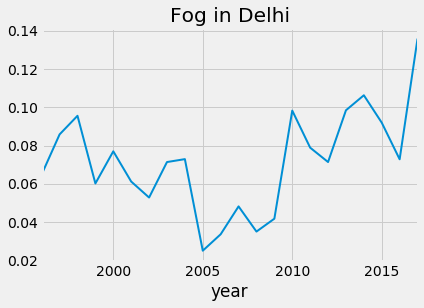

In [83]:
delhi_fog = data.groupby(data.year).mean()
delhi_fog._fog.plot(linewidth=2)
a6 = delhi_fog._fog
plt.title('Fog in Delhi')
plt.xlabel('year')

## Hail 

Text(0.5, 0, 'year')

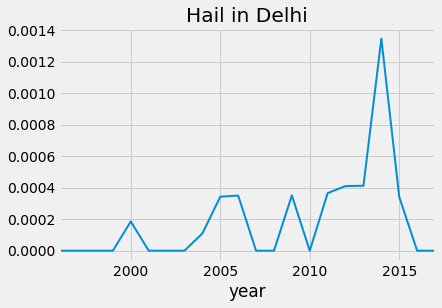

In [84]:
delhi_hail = data.groupby(data.year).mean()
delhi_hail._hail.plot(linewidth=2)
a7 = delhi_hail._hail
plt.title('Hail in Delhi')
plt.xlabel('year')

## Heatindex 

Text(0.5, 0, 'month')

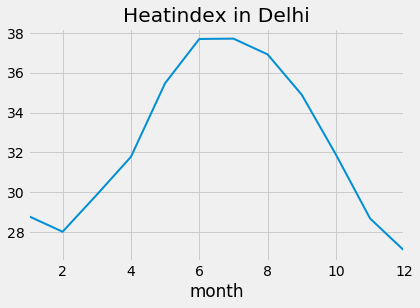

In [85]:
delhi_heatindexm = data.groupby(data.month).mean()
delhi_heatindexm._heatindexm.plot(linewidth=2)
a8 = delhi_heatindexm._heatindexm
plt.title('Heatindex in Delhi')
plt.xlabel('month')

## Temperature

Text(0.5, 0, 'year')

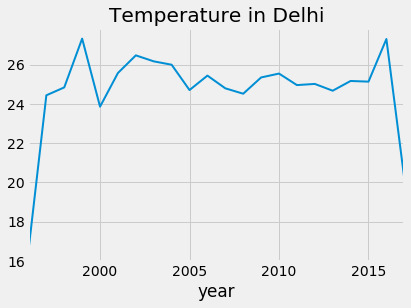

In [86]:
delhi_tempm = data.groupby(data.year).mean()
delhi_tempm._tempm.plot(linewidth=2)
a11 = delhi_tempm._tempm
plt.title('Temperature in Delhi')
plt.xlabel('year')

## Thunder 

Text(0.5, 0, 'year')

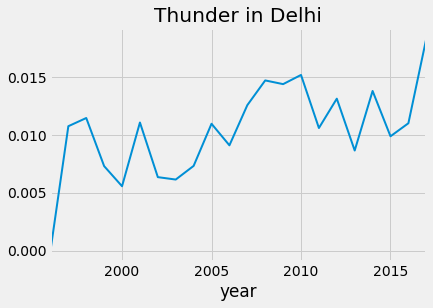

In [87]:
delhi_thunder = data.groupby(data.year).mean()
delhi_thunder._thunder.plot(linewidth=2)
a22 = delhi_thunder._thunder
plt.title('Thunder in Delhi')
plt.xlabel('year')

## Tornado 

Text(0.5, 0, 'year')

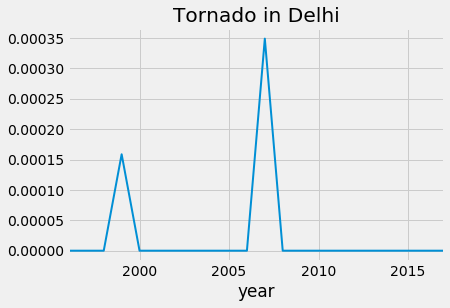

In [88]:
delhi_tornado = data.groupby(data.year).mean()
delhi_tornado._tornado.plot(linewidth=2)
a33 = delhi_tornado._tornado
plt.title('Tornado in Delhi')
plt.xlabel('year')

## Vism 

Text(0.5, 0, 'year')

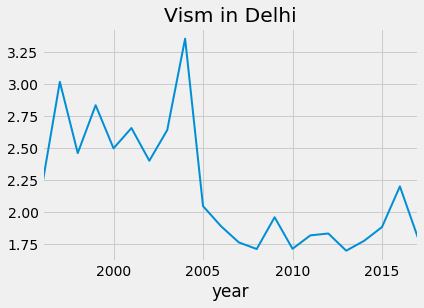

In [89]:
delhi_vism = data.groupby(data.year).mean()
delhi_vism._vism.plot(linewidth=2)
a44 = delhi_vism._vism
plt.title('Vism in Delhi')
plt.xlabel('year')

## Wdird 

Text(0.5, 0, 'year')

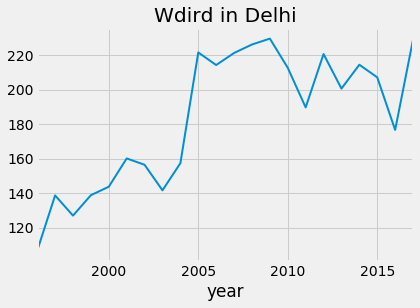

In [90]:
delhi_wdird = data.groupby(data.year).mean()
delhi_wdird._wdird.plot(linewidth=2)
a55 = delhi_wdird._wdird
plt.title('Wdird in Delhi')
plt.xlabel('year')

## Wspdm 

Text(0.5, 0, 'year')

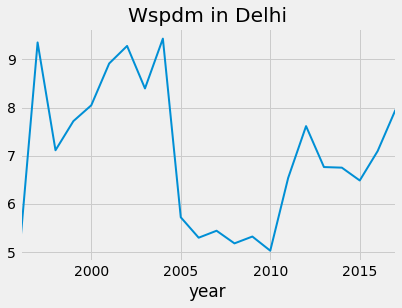

In [91]:
delhi_wspdm = data.groupby(data.year).mean()
delhi_wspdm._wspdm.plot(linewidth=2)
a66 = delhi_wspdm._wspdm
plt.title('Wspdm in Delhi')
plt.xlabel('year')

##  Wgustm

Text(0.5, 0, 'month')

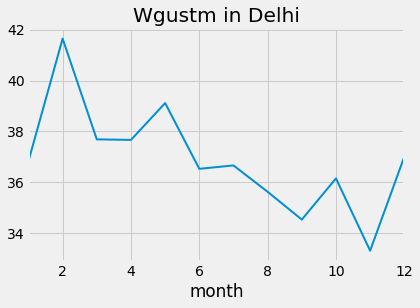

In [92]:
delhi_wgustm = data.groupby(data.month).mean()
delhi_wgustm._wgustm.plot(linewidth=2)
a77 = delhi_wgustm._wgustm
plt.title('Wgustm in Delhi')
plt.xlabel('month')

## Windchill 

Text(0.5, 0, 'month')

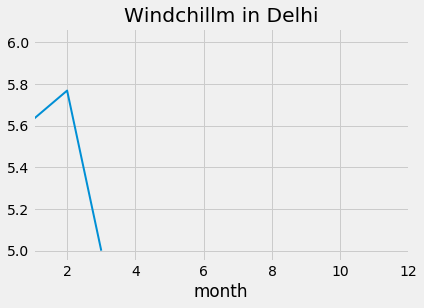

In [93]:
delhi_windchillm = data.groupby(data.month).mean()
delhi_windchillm._windchillm.plot(linewidth=2)
a88 = delhi_windchillm._windchillm
plt.title('Windchillm in Delhi')
plt.xlabel('month')

# Subplot 

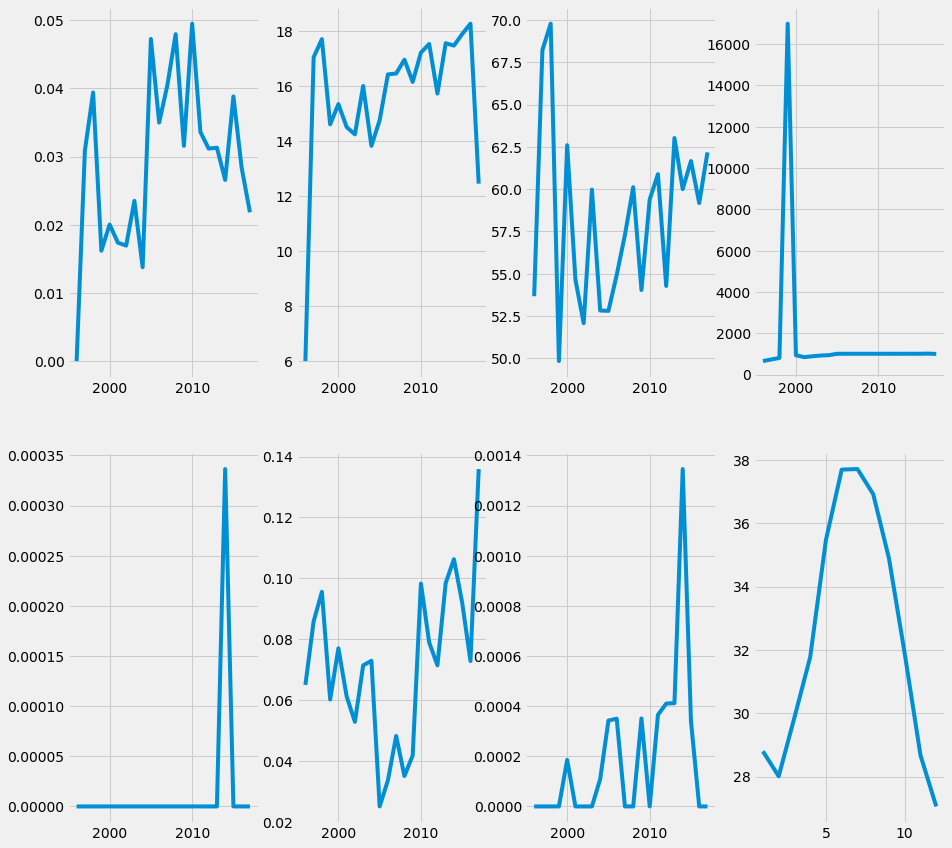

In [94]:
fig = plt.figure(figsize=(14,14))
plt1 = fig.add_subplot(241)
plt2 = fig.add_subplot(242)
plt3 = fig.add_subplot(243)
plt4 = fig.add_subplot(244)
plt5 = fig.add_subplot(245)
plt6 = fig.add_subplot(246)
plt7 = fig.add_subplot(247)
plt8 = fig.add_subplot(248)
plt1.plot(a1)
plt2.plot(a2)
plt3.plot(a3)
plt4.plot(a4)
plt5.plot(a5)
plt6.plot(a6)
plt7.plot(a7)
plt8.plot(a8)

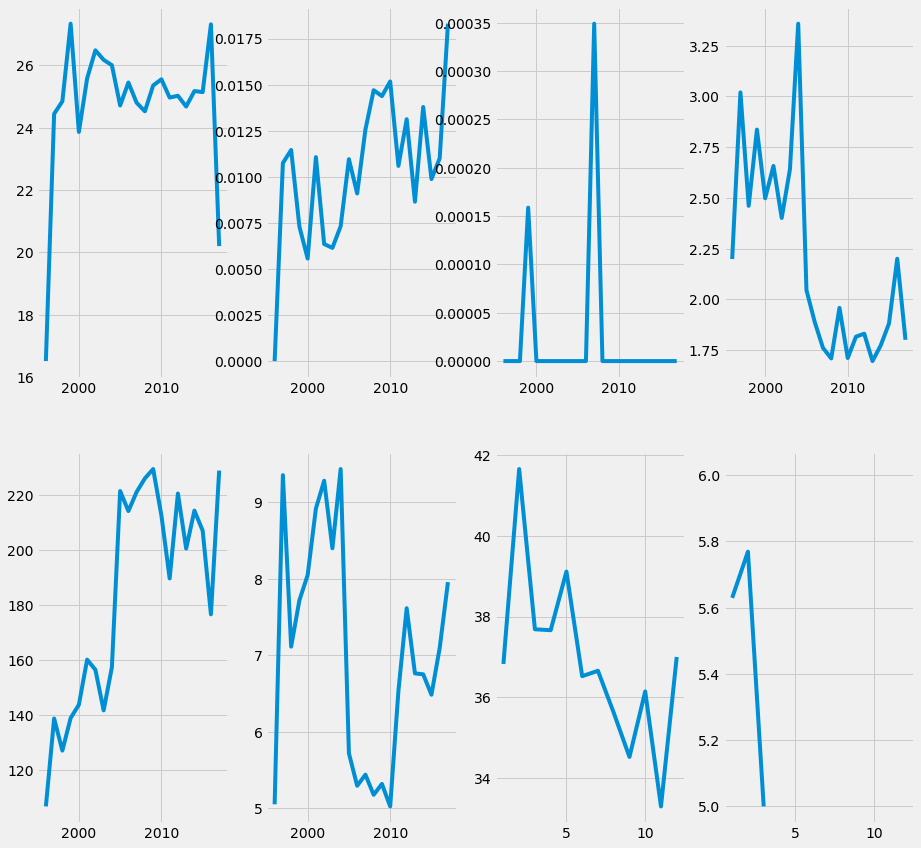

In [95]:
fig2 = plt.figure(figsize=(14,14))
plt1 = fig2.add_subplot(241)
plt2 = fig2.add_subplot(242)
plt3 = fig2.add_subplot(243)
plt4 = fig2.add_subplot(244)
plt5 = fig2.add_subplot(245)
plt6 = fig2.add_subplot(246)
plt7 = fig2.add_subplot(247)
plt8 = fig2.add_subplot(248)
plt1.plot(a11)
plt2.plot(a22)
plt3.plot(a33)
plt4.plot(a44)
plt5.plot(a55)
plt6.plot(a66)
plt7.plot(a77)
plt8.plot(a88)

# Pie Chart 

In [96]:
colors = ['r', 'm', 'g', 'b', 'y']

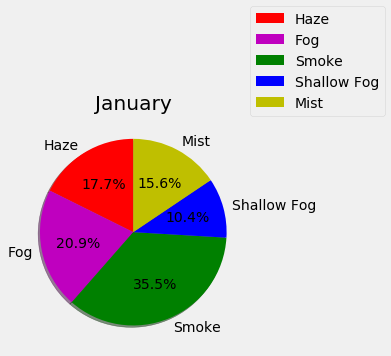

In [97]:
activities = ['Haze', 'Fog', 'Smoke', 'Shallow Fog', 'Mist']
slices = []
for x in activities:
    slices.append(len(data[(data['month']==1) & (data['_conds']==x)]))
plt.pie(slices, labels=activities, colors=colors, shadow=True, autopct="%1.1f%%", startangle=90)

plt.legend(loc=(1,1))
plt.title('January')
plt.show()

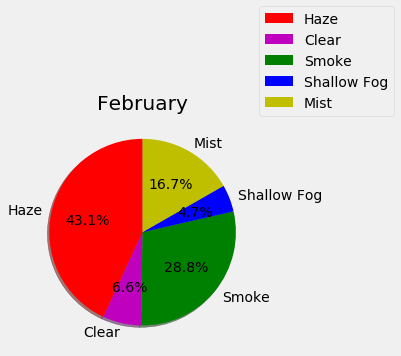

In [98]:
activities = ['Haze', 'Clear', 'Smoke', 'Shallow Fog', 'Mist']
slices = []
for x in activities:
    slices.append(len(data[(data['month']==2) & (data['_conds']==x)]))
plt.pie(slices, labels=activities, colors=colors, shadow=True, autopct="%1.1f%%", startangle=90)

plt.legend(loc=(1,1))
plt.title('February')
plt.show()

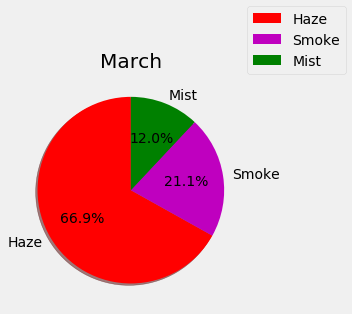

In [99]:
activities = ['Haze', 'Smoke', 'Mist']
slices = []
for x in activities:
    slices.append(len(data[(data['month']==3) & (data['_conds']==x)]))
plt.pie(slices, labels=activities, colors=colors, shadow=True, autopct="%1.1f%%", startangle=90)

plt.legend(loc=(1,1))
plt.title('March')
plt.show()

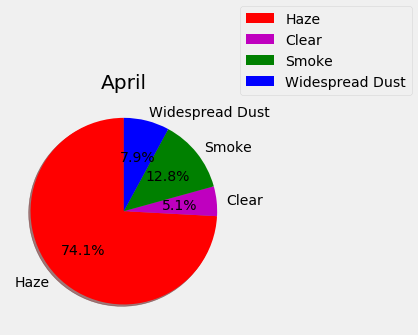

In [100]:
activities = ['Haze','Clear', 'Smoke', 'Widespread Dust']
slices = []
for x in activities:
    slices.append(len(data[(data['month']==4) & (data['_conds']==x)]))
plt.pie(slices, labels=activities, colors=colors, shadow=True, autopct="%1.1f%%", startangle=90)

plt.legend(loc=(1,1))
plt.title('April')
plt.show()

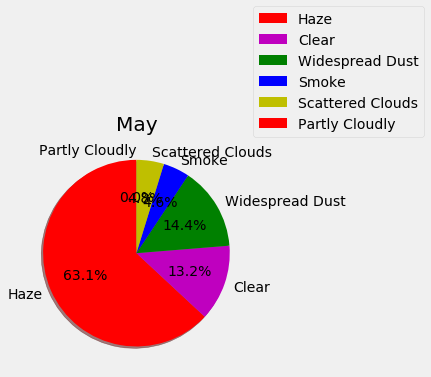

In [101]:
activities = ['Haze','Clear','Widespread Dust','Smoke', 'Scattered Clouds', 'Partly Cloudly']
slices = []
for x in activities:
    slices.append(len(data[(data['month']==5) & (data['_conds']==x)]))
plt.pie(slices, labels=activities, colors=colors, shadow=True, autopct="%1.1f%%", startangle=90)

plt.legend(loc=(1,1))
plt.title('May')
plt.show()

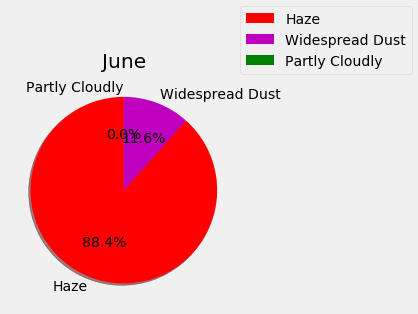

In [102]:
activities = ['Haze', 'Widespread Dust', 'Partly Cloudly']
slices = []
for x in activities:
    slices.append(len(data[(data['month']==6) & (data['_conds']==x)]))
plt.pie(slices, labels=activities, colors=colors, shadow=True, autopct="%1.1f%%", startangle=90)

plt.legend(loc=(1,1))
plt.title('June')
plt.show()

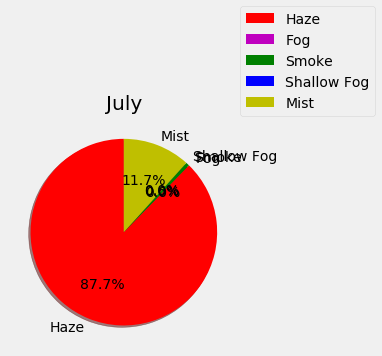

In [103]:
activities = ['Haze', 'Fog', 'Smoke', 'Shallow Fog', 'Mist']
slices = []
for x in activities:
    slices.append(len(data[(data['month']==7) & (data['_conds']==x)]))
plt.pie(slices, labels=activities, colors=colors, shadow=True, autopct="%1.1f%%", startangle=90)

plt.legend(loc=(1,1))
plt.title('July')
plt.show()

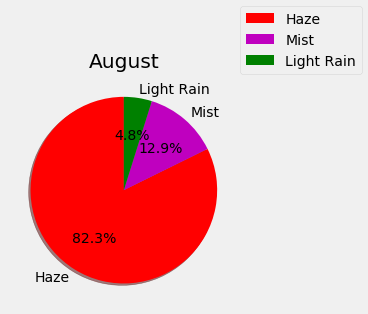

In [104]:
activities = ['Haze', 'Mist', 'Light Rain']
slices = []
for x in activities:
    slices.append(len(data[(data['month']==8) & (data['_conds']==x)]))
plt.pie(slices, labels=activities, colors=colors, shadow=True, autopct="%1.1f%%", startangle=90)

plt.legend(loc=(1,1))
plt.title('August')
plt.show()

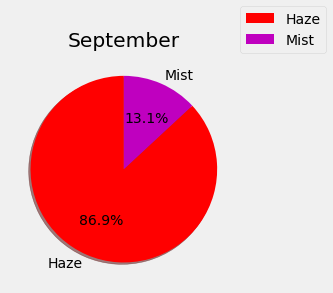

In [105]:
activities = ['Haze', 'Mist']
slices = []
for x in activities:
    slices.append(len(data[(data['month']==9) & (data['_conds']==x)]))
plt.pie(slices, labels=activities, colors=colors, shadow=True, autopct="%1.1f%%", startangle=90)

plt.legend(loc=(1,1))
plt.title('September')
plt.show()

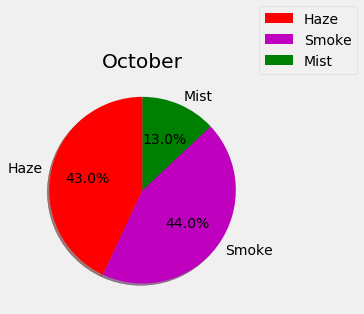

In [106]:
activities = ['Haze', 'Smoke', 'Mist']
slices = []
for x in activities:
    slices.append(len(data[(data['month']==10) & (data['_conds']==x)]))
plt.pie(slices, labels=activities, colors=colors, shadow=True, autopct="%1.1f%%", startangle=90)

plt.legend(loc=(1,1))
plt.title('October')
plt.show()

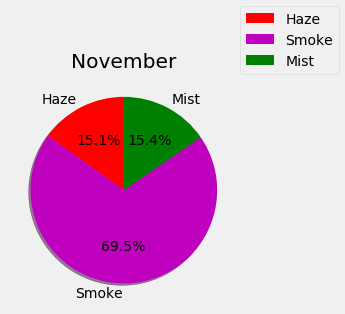

In [107]:
activities = ['Haze', 'Smoke', 'Mist']
slices = []
for x in activities:
    slices.append(len(data[(data['month']==11) & (data['_conds']==x)]))
plt.pie(slices, labels=activities, colors=colors, shadow=True, autopct="%1.1f%%", startangle=90)

plt.legend(loc=(1,1))
plt.title('November')
plt.show()

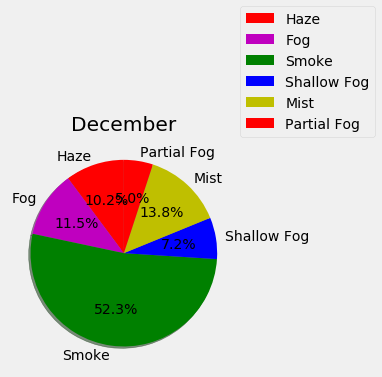

In [108]:
activities = ['Haze', 'Fog', 'Smoke', 'Shallow Fog', 'Mist','Partial Fog']
slices = []
for x in activities:
    slices.append(len(data[(data['month']==12) & (data['_conds']==x)]))
plt.pie(slices, labels=activities, colors=colors, shadow=True, autopct="%1.1f%%", startangle=90)

plt.legend(loc=(1,1))
plt.title('December')
plt.show()